<a href="https://colab.research.google.com/github/ojasrai17/IP_miniproject/blob/main/IP_Project_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Detected Traffic Signal: RED


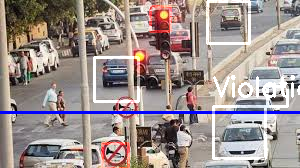

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the input image
image_path = '/content/input2.jfif'  # Path to your input image
input_image = cv2.imread(image_path)

if input_image is None:
    raise ValueError("Input image could not be loaded. Check the path.")

# Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(input_image, (5, 5), 0)

# Convert the blurred image to HSV color space
hsv_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2HSV)

# Visualize the HSV image


# Define color ranges for red and green signals
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])
lower_green = np.array([40, 100, 100])
upper_green = np.array([80, 255, 255])

# Create masks for red and green
mask_red1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
mask_green = cv2.inRange(hsv_image, lower_green, upper_green)

# Combine the red masks
mask_red = cv2.add(mask_red1, mask_red2)

# Morphological operations to clean up masks
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
mask_red = cv2.morphologyEx(mask_red, cv2.MORPH_CLOSE, kernel)
mask_green = cv2.morphologyEx(mask_green, cv2.MORPH_CLOSE, kernel)



# Create a blank image for highlighting
highlight_image = np.zeros_like(input_image)

# Find contours for red signals
contours_red, _ = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
signal_detected = "UNKNOWN"

# Draw bounding boxes for red signals
for cnt in contours_red:
    if cv2.contourArea(cnt) > 300:  # Adjusted area threshold
        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = float(w) / h
        if 0.5 < aspect_ratio < 2:  # Check for a valid aspect ratio
            cv2.rectangle(highlight_image, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Red box
            signal_detected = "RED"

# Find contours for green signals
contours_green, _ = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes for green signals
for cnt in contours_green:
    if cv2.contourArea(cnt) > 300:  # Adjusted area threshold
        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = float(w) / h
        if 0.5 < aspect_ratio < 2:  # Check for a valid aspect ratio
            cv2.rectangle(highlight_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green box
            signal_detected = "GREEN"

# Print detected signal
print(f"Detected Traffic Signal: {signal_detected}")

# Load Haar cascade for vehicle detection
car_cascade_path = '/content/haarcascade_car.xml'  # Adjust the path as necessary
car_cascade = cv2.CascadeClassifier(car_cascade_path)

if car_cascade.empty():
    raise ValueError("Haar cascade could not be loaded. Check the file path.")

# Function to detect vehicles
def detect_vehicles(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    vehicles = car_cascade.detectMultiScale(gray, 1.1, 1)
    return vehicles

# Detect vehicles in input image
vehicles = detect_vehicles(input_image)

# Define stop line position (example: bottom third of the image)
stop_line_y = 2 * input_image.shape[0] // 3
cv2.line(input_image, (0, stop_line_y), (input_image.shape[1], stop_line_y), (255, 0, 0), 2)  # Blue line for stop line

# Draw bounding boxes for vehicles and check for violations
if signal_detected == "RED":
    for (x, y, w, h) in vehicles:
        # Check if the vehicle crosses the stop line
        if y + h > stop_line_y:
            cv2.rectangle(highlight_image, (x, y), (x + w, y + h), (255, 255, 255), 2)  # White box for violating vehicles
            cv2.putText(input_image, "Violation Detected", (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)

# Draw bounding boxes for all detected vehicles
for (x, y, w, h) in vehicles:
    cv2.rectangle(highlight_image, (x, y), (x + w, y + h), (255, 255, 255), 2)  # White box for vehicles

# Combine the original image with the highlight image
final_output = cv2.addWeighted(input_image, 1, highlight_image, 0.5, 0)

# Display the result
cv2_imshow(final_output)


Detected Traffic Signal: RED


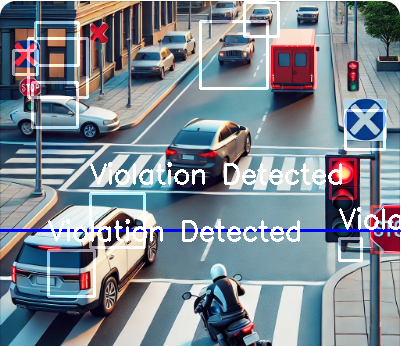

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the input image
image_path = '/content/input1.png'  # Path to your input image
input_image = cv2.imread(image_path)

if input_image is None:
    raise ValueError("Input image could not be loaded. Check the path.")

# Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(input_image, (5, 5), 0)

# Convert the blurred image to HSV color space
hsv_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2HSV)

# Visualize the HSV image


# Define color ranges for red and green signals
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])
lower_green = np.array([40, 100, 100])
upper_green = np.array([80, 255, 255])

# Create masks for red and green
mask_red1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
mask_green = cv2.inRange(hsv_image, lower_green, upper_green)

# Combine the red masks
mask_red = cv2.add(mask_red1, mask_red2)

# Morphological operations to clean up masks
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
mask_red = cv2.morphologyEx(mask_red, cv2.MORPH_CLOSE, kernel)
mask_green = cv2.morphologyEx(mask_green, cv2.MORPH_CLOSE, kernel)



# Create a blank image for highlighting
highlight_image = np.zeros_like(input_image)

# Find contours for red signals
contours_red, _ = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
signal_detected = "UNKNOWN"

# Draw bounding boxes for red signals
for cnt in contours_red:
    if cv2.contourArea(cnt) > 300:  # Adjusted area threshold
        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = float(w) / h
        if 0.5 < aspect_ratio < 2:  # Check for a valid aspect ratio
            cv2.rectangle(highlight_image, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Red box
            signal_detected = "RED"

# Find contours for green signals
contours_green, _ = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes for green signals
for cnt in contours_green:
    if cv2.contourArea(cnt) > 300:  # Adjusted area threshold
        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = float(w) / h
        if 0.5 < aspect_ratio < 2:  # Check for a valid aspect ratio
            cv2.rectangle(highlight_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green box
            signal_detected = "GREEN"

# Print detected signal
print(f"Detected Traffic Signal: {signal_detected}")

# Load Haar cascade for vehicle detection
car_cascade_path = '/content/haarcascade_car.xml'  # Adjust the path as necessary
car_cascade = cv2.CascadeClassifier(car_cascade_path)

if car_cascade.empty():
    raise ValueError("Haar cascade could not be loaded. Check the file path.")

# Function to detect vehicles
def detect_vehicles(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    vehicles = car_cascade.detectMultiScale(gray, 1.1, 1)
    return vehicles

# Detect vehicles in input image
vehicles = detect_vehicles(input_image)

# Define stop line position (example: bottom third of the image)
stop_line_y = 2 * input_image.shape[0] // 3
cv2.line(input_image, (0, stop_line_y), (input_image.shape[1], stop_line_y), (255, 0, 0), 2)  # Blue line for stop line

# Draw bounding boxes for vehicles and check for violations
if signal_detected == "RED":
    for (x, y, w, h) in vehicles:
        # Check if the vehicle crosses the stop line
        if y + h > stop_line_y:
            cv2.rectangle(highlight_image, (x, y), (x + w, y + h), (255, 255, 255), 2)  # White box for violating vehicles
            cv2.putText(input_image, "Violation Detected", (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)

# Draw bounding boxes for all detected vehicles
for (x, y, w, h) in vehicles:
    cv2.rectangle(highlight_image, (x, y), (x + w, y + h), (255, 255, 255), 2)  # White box for vehicles

# Combine the original image with the highlight image
final_output = cv2.addWeighted(input_image, 1, highlight_image, 0.5, 0)

# Display the result
cv2_imshow(final_output)


Detected Traffic Signal: GREEN


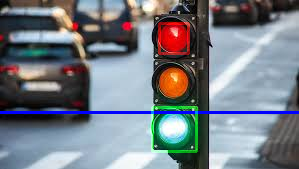

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the input image
image_path = '/content/input6.jfif'  # Path to your input image
input_image = cv2.imread(image_path)

if input_image is None:
    raise ValueError("Input image could not be loaded. Check the path.")

# Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(input_image, (5, 5), 0)

# Convert the blurred image to HSV color space
hsv_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2HSV)

# Visualize the HSV image


# Define color ranges for red and green signals
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])
lower_green = np.array([40, 100, 100])
upper_green = np.array([80, 255, 255])

# Create masks for red and green
mask_red1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
mask_green = cv2.inRange(hsv_image, lower_green, upper_green)

# Combine the red masks
mask_red = cv2.add(mask_red1, mask_red2)

# Morphological operations to clean up masks
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
mask_red = cv2.morphologyEx(mask_red, cv2.MORPH_CLOSE, kernel)
mask_green = cv2.morphologyEx(mask_green, cv2.MORPH_CLOSE, kernel)



# Create a blank image for highlighting
highlight_image = np.zeros_like(input_image)

# Find contours for red signals
contours_red, _ = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
signal_detected = "UNKNOWN"

# Draw bounding boxes for red signals
for cnt in contours_red:
    if cv2.contourArea(cnt) > 300:  # Adjusted area threshold
        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = float(w) / h
        if 0.5 < aspect_ratio < 2:  # Check for a valid aspect ratio
            cv2.rectangle(highlight_image, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Red box
            signal_detected = "RED"

# Find contours for green signals
contours_green, _ = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes for green signals
for cnt in contours_green:
    if cv2.contourArea(cnt) > 300:  # Adjusted area threshold
        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = float(w) / h
        if 0.5 < aspect_ratio < 2:  # Check for a valid aspect ratio
            cv2.rectangle(highlight_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green box
            signal_detected = "GREEN"

# Print detected signal
print(f"Detected Traffic Signal: {signal_detected}")

# Load Haar cascade for vehicle detection
car_cascade_path = '/content/haarcascade_car.xml'  # Adjust the path as necessary
car_cascade = cv2.CascadeClassifier(car_cascade_path)

if car_cascade.empty():
    raise ValueError("Haar cascade could not be loaded. Check the file path.")

# Function to detect vehicles
def detect_vehicles(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    vehicles = car_cascade.detectMultiScale(gray, 1.1, 1)
    return vehicles

# Detect vehicles in input image
vehicles = detect_vehicles(input_image)

# Define stop line position (example: bottom third of the image)
stop_line_y = 2 * input_image.shape[0] // 3
cv2.line(input_image, (0, stop_line_y), (input_image.shape[1], stop_line_y), (255, 0, 0), 2)  # Blue line for stop line

# Draw bounding boxes for vehicles and check for violations
if signal_detected == "RED":
    for (x, y, w, h) in vehicles:
        # Check if the vehicle crosses the stop line
        if y + h > stop_line_y:
            cv2.rectangle(highlight_image, (x, y), (x + w, y + h), (255, 255, 255), 2)  # White box for violating vehicles
            cv2.putText(input_image, "Violation Detected", (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)

# Draw bounding boxes for all detected vehicles
for (x, y, w, h) in vehicles:
    cv2.rectangle(highlight_image, (x, y), (x + w, y + h), (255, 255, 255), 2)  # White box for vehicles

# Combine the original image with the highlight image
final_output = cv2.addWeighted(input_image, 1, highlight_image, 0.5, 0)

# Display the result
cv2_imshow(final_output)


Detected Traffic Signal: RED


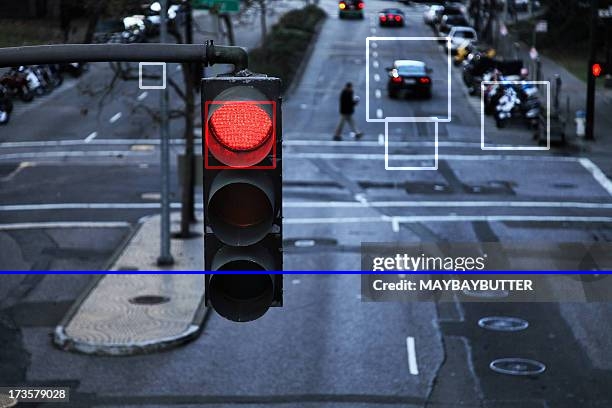

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the input image
image_path = '/content/input10.jpg'  # Path to your input image
input_image = cv2.imread(image_path)

if input_image is None:
    raise ValueError("Input image could not be loaded. Check the path.")

# Apply Gaussian blur to reduce noise
blurred_image = cv2.GaussianBlur(input_image, (5, 5), 0)

# Convert the blurred image to HSV color space
hsv_image = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2HSV)

# Visualize the HSV image


# Define color ranges for red and green signals
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])
lower_green = np.array([40, 100, 100])
upper_green = np.array([80, 255, 255])

# Create masks for red and green
mask_red1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
mask_green = cv2.inRange(hsv_image, lower_green, upper_green)

# Combine the red masks
mask_red = cv2.add(mask_red1, mask_red2)

# Morphological operations to clean up masks
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
mask_red = cv2.morphologyEx(mask_red, cv2.MORPH_CLOSE, kernel)
mask_green = cv2.morphologyEx(mask_green, cv2.MORPH_CLOSE, kernel)



# Create a blank image for highlighting
highlight_image = np.zeros_like(input_image)

# Find contours for red signals
contours_red, _ = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
signal_detected = "UNKNOWN"

# Draw bounding boxes for red signals
for cnt in contours_red:
    if cv2.contourArea(cnt) > 300:  # Adjusted area threshold
        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = float(w) / h
        if 0.5 < aspect_ratio < 2:  # Check for a valid aspect ratio
            cv2.rectangle(highlight_image, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Red box
            signal_detected = "RED"

# Find contours for green signals
contours_green, _ = cv2.findContours(mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes for green signals
for cnt in contours_green:
    if cv2.contourArea(cnt) > 300:  # Adjusted area threshold
        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = float(w) / h
        if 0.5 < aspect_ratio < 2:  # Check for a valid aspect ratio
            cv2.rectangle(highlight_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green box
            signal_detected = "GREEN"

# Print detected signal
print(f"Detected Traffic Signal: {signal_detected}")

# Load Haar cascade for vehicle detection
car_cascade_path = '/content/haarcascade_car.xml'  # Adjust the path as necessary
car_cascade = cv2.CascadeClassifier(car_cascade_path)

if car_cascade.empty():
    raise ValueError("Haar cascade could not be loaded. Check the file path.")

# Function to detect vehicles
def detect_vehicles(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    vehicles = car_cascade.detectMultiScale(gray, 1.1, 1)
    return vehicles

# Detect vehicles in input image
vehicles = detect_vehicles(input_image)

# Define stop line position (example: bottom third of the image)
stop_line_y = 2 * input_image.shape[0] // 3
cv2.line(input_image, (0, stop_line_y), (input_image.shape[1], stop_line_y), (255, 0, 0), 2)  # Blue line for stop line

# Draw bounding boxes for vehicles and check for violations
if signal_detected == "RED":
    for (x, y, w, h) in vehicles:
        # Check if the vehicle crosses the stop line
        if y + h > stop_line_y:
            cv2.rectangle(highlight_image, (x, y), (x + w, y + h), (255, 255, 255), 2)  # White box for violating vehicles
            cv2.putText(input_image, "Violation Detected", (x, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 255, 255), 2)

# Draw bounding boxes for all detected vehicles
for (x, y, w, h) in vehicles:
    cv2.rectangle(highlight_image, (x, y), (x + w, y + h), (255, 255, 255), 2)  # White box for vehicles

# Combine the original image with the highlight image
final_output = cv2.addWeighted(input_image, 1, highlight_image, 0.5, 0)

# Display the result
cv2_imshow(final_output)
